# Agentic flow

## 🎯 The Complete Agentic AI Cycle: Plan → Act → Observe → Reflect

Let me break down each element of the **Plan → Act → Observe → Reflect** cycle within Agentic AI (and how we implement it in LangGraph).

---

## 1️⃣ **Plan (Planning Phase)**

**📍 Position:** After the LLM understands user intent (Parsing)

**⚡ What it does:**
- Converts user intent into an executable plan
- Determines: Which tool is appropriate? What's the first step? If results are unclear, should I ask the user again?

**🛠️ Examples:**
- User says: *"Calculate Biden's age × 2"* → Plan = (Search for Biden's age) + (Multiply × 2 with calculator)

---

## 2️⃣ **Act (Execution Phase)**

**📍 Position:** Tool execution stage

**⚡ What it does:**
- Executes the steps defined by the Plan
- Calls one tool (or multiple) as needed

**🛠️ Examples:**
- Call `SearchAPI("Biden age")`
- Then `Calculator(81*2)`

---

## 3️⃣ **Observe (Review Phase)**

**📍 Position:** Between Tools and Integration

**⚡ What it does:**
- Reviews tool results: Is it correct? Is it sufficient?
- Compares results with plan expectations
- If wrong or incomplete → return to Plan

**🛠️ Examples:**
- Observation: SearchAPI returned "81 years"
- Verification: Yes, the value is logical

---

## 4️⃣ **Reflect (Re-thinking / Learning Phase)**

**📍 Position:** At the entire Loop level (between Planning ↔ Tools ↔ Observe)

**⚡ What it does:**
- Evaluates: Is the result satisfactory or do I need to modify the plan?
- Can store learning in **Memory** for future use

**🛠️ Examples:**
- "Calculator returned 162 → Result is correct → End cycle and return response to user"
- Or: "Result is unclear → Modify plan and use alternative tool"

---

## 🔁 **Complete Cycle Flow (ReAct Loop):**

```
Plan → Act → Observe → Reflect → (Either Loop Again or Final Output)
```





# Lang graph flow

## 🎯 Connecting Theoretical Loop to LangGraph Implementation

Perfect! Let me connect the **theoretical Loop (Plan → Act → Observe → Reflect)** with **LangGraph** practically:

---

## 🔄 **The Loop in LangGraph**

### 1️⃣ **Plan → Node (LLM / Planner)**
- In LangGraph, the **Plan** step = Node responsible for planning
- Could be an LLM writing a plan: "We'll need to use Search API first → then summarize results → then answer the user"
- This planning gets stored in **State** (temporary memory flowing through the graph)

### 2️⃣ **Act → Node (Tool / Function Call)**
- The **Act** step = executing a specific plan using Tool, API, or Function
- In LangGraph, this is a Node that performs `tool.invoke()` for example
- The result (Output) gets stored in the State

### 3️⃣ **Observe → Transition / Memory Update**
- After execution, the Agent reviews the result (Observation)
- In LangGraph, this appears as **State update** + Edge that returns the result to Planner Node or Reflect Node

### 4️⃣ **Reflect → Node (Reflector / Validator)**
- If result is insufficient/contains errors → Node responsible for **thinking and re-evaluation**
- Reflect Node could be = LLM asking itself: "Is this result sufficient to answer the question? If not, try another tool."
- Afterwards, either returns to **Planner** (Cycle) or terminates

### 5️⃣ **Finish → Exit Node**
- If result is correct and complete → Edge goes to **Finish Node** and returns final Output to user

---

## 🏗️ **LangGraph Architecture Mapping:**

```
[START]
   ↓
[PLANNER NODE] ← Plan Phase (LLM generates strategy)
   ↓
[TOOL NODE] ← Act Phase (Execute tools/APIs)
   ↓
[OBSERVER EDGE] ← Observe Phase (State update)
   ↓
[REFLECTOR NODE] ← Reflect Phase (Validate results)
   ↓
Decision Diamond: Complete?
   ↓ No (Loop back)     ↓ Yes
[PLANNER NODE]    [FINISH NODE] → [OUTPUT]
```




⚡ ReAct Approach (Reasoning + Acting) ReAct = Reasoning + Acting - A strategy that combines thinking and doing: ReAct Cycle:

🤔 Thought (Reasoning) → Internal planning: "I need to search for information" 🔧 Action (Acting) → Execute tool (Search, Calculator, etc.) 👁️ Observation → Receive tool results 🤔 Thought (Again) → Process the results 🔧 Action/Answer → Continue with another tool OR provide final answer

In [2]:
from IPython.core.display import display, HTML

html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>LangGraph Flow Diagram Explanation</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            margin: 0;
            padding: 20px;
            color: #333;
        }

        .container {
            max-width: 1200px;
            margin: 0 auto;
            background: white;
            border-radius: 20px;
            box-shadow: 0 20px 40px rgba(0,0,0,0.1);
            overflow: hidden;
        }

        .header {
            background: linear-gradient(45deg, #FF6B6B, #4ECDC4);
            color: white;
            padding: 30px;
            text-align: center;
        }

        .header h1 {
            margin: 0;
            font-size: 2.5em;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
        }

        .content {
            padding: 30px;
        }

        .flow-section {
            margin-bottom: 40px;
            padding: 20px;
            border-radius: 15px;
            border-left: 5px solid;
            background: #f8f9fa;
            transition: all 0.3s ease;
            cursor: pointer;
        }

        .flow-section:hover {
            transform: translateY(-5px);
            box-shadow: 0 10px 20px rgba(0,0,0,0.1);
        }

        .user-input { border-left-color: #4CAF50; background: linear-gradient(135deg, #e8f5e8, #f1f8e9); }
        .state-mgmt { border-left-color: #2196F3; background: linear-gradient(135deg, #e3f2fd, #f3e5f5); }
        .llm-processing { border-left-color: #FF9800; background: linear-gradient(135deg, #fff3e0, #fce4ec); }
        .memory-system { border-left-color: #9C27B0; background: linear-gradient(135deg, #f3e5f5, #e8eaf6); }
        .planning { border-left-color: #F44336; background: linear-gradient(135deg, #ffebee, #fff8e1); }
        .tools-actions { border-left-color: #607D8B; background: linear-gradient(135deg, #eceff1, #f1f8e9); }
        .observation { border-left-color: #795548; background: linear-gradient(135deg, #efebe9, #f3e5f5); }
        .output { border-left-color: #4CAF50; background: linear-gradient(135deg, #e8f5e8, #e0f2f1); }

        .step-title {
            font-size: 1.5em;
            font-weight: bold;
            margin-bottom: 15px;
            display: flex;
            align-items: center;
            gap: 10px;
        }

        .step-icon {
            font-size: 1.2em;
            padding: 10px;
            border-radius: 50%;
            color: white;
            min-width: 40px;
            text-align: center;
        }

        .user-input .step-icon { background: #4CAF50; }
        .state-mgmt .step-icon { background: #2196F3; }
        .llm-processing .step-icon { background: #FF9800; }
        .memory-system .step-icon { background: #9C27B0; }
        .planning .step-icon { background: #F44336; }
        .tools-actions .step-icon { background: #607D8B; }
        .observation .step-icon { background: #795548; }
        .output .step-icon { background: #4CAF50; }

        .step-description {
            font-size: 1.1em;
            line-height: 1.6;
            margin-bottom: 15px;
        }

        .features {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
            gap: 15px;
            margin-top: 15px;
        }

        .feature {
            background: rgba(255,255,255,0.7);
            padding: 15px;
            border-radius: 10px;
            border: 1px solid rgba(0,0,0,0.1);
        }

        .feature-title {
            font-weight: bold;
            color: #333;
            margin-bottom: 5px;
        }

        .arrow {
            text-align: center;
            font-size: 2em;
            color: #666;
            margin: 20px 0;
            animation: bounce 2s infinite;
        }

        @keyframes bounce {
            0%, 20%, 50%, 80%, 100% { transform: translateY(0); }
            40% { transform: translateY(-10px); }
            60% { transform: translateY(-5px); }
        }

        .workflow-summary {
            background: linear-gradient(135deg, #667eea, #764ba2);
            color: white;
            padding: 30px;
            border-radius: 15px;
            margin-top: 40px;
            text-align: center;
        }

        .workflow-summary h2 {
            margin-top: 0;
            font-size: 2em;
        }

        .workflow-steps {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 20px;
            margin-top: 20px;
        }

        .workflow-step {
            background: rgba(255,255,255,0.1);
            padding: 15px;
            border-radius: 10px;
            border: 1px solid rgba(255,255,255,0.2);
        }

        .code-example {
            background: #2d3748;
            color: #e2e8f0;
            padding: 20px;
            border-radius: 10px;
            margin: 15px 0;
            font-family: 'Courier New', monospace;
            overflow-x: auto;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>🚀 Advanced LangGraph Flow Diagram</h1>
            <p>Comprehensive Guide to Understanding Interactive AI Systems</p>
        </div>

        <div class="content">
            <div class="flow-section user-input">
                <div class="step-title">
                    <div class="step-icon">📤</div>
                    1. User Input
                </div>
                <div class="step-description">
                    The starting point where users provide questions, commands, or requests. This triggers the entire AI processing pipeline.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">Input Types:</div>
                        Text queries, commands, questions, complex requests
                    </div>
                    <div class="feature">
                        <div class="feature-title">Processing:</div>
                        Natural language understanding and intent recognition
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section state-mgmt">
                <div class="step-title">
                    <div class="step-icon">📋</div>
                    2. State Management
                </div>
                <div class="step-description">
                    Central control hub that maintains all current information, context, conversation history, and temporary data during processing.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">Context Tracking:</div>
                        Conversation history, user preferences, session data
                    </div>
                    <div class="feature">
                        <div class="feature-title">Data Flow:</div>
                        Manages information between different components
                    </div>
                    <div class="feature">
                        <div class="feature-title">Persistence:</div>
                        Temporary storage for processing steps
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section llm-processing">
                <div class="step-title">
                    <div class="step-icon">🧠</div>
                    3. LLM Processing Hub
                </div>
                <div class="step-description">
                    The core intelligence layer consisting of three main components working together to understand, reason, and make decisions.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">🔍 Understanding:</div>
                        Analyzes input, extracts meaning, identifies intent
                    </div>
                    <div class="feature">
                        <div class="feature-title">💭 Internal Reasoning:</div>
                        Generates thoughts, considers options, creates drafts
                    </div>
                    <div class="feature">
                        <div class="feature-title">⚖️ Reflection:</div>
                        Evaluates results, decides next actions, quality control
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section memory-system">
                <div class="step-title">
                    <div class="step-icon">🗄️</div>
                    4. Memory System
                </div>
                <div class="step-description">
                    Retrieval and storage system for long-term context, knowledge base, and historical information to enhance responses.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">Knowledge Retrieval:</div>
                        Fetch relevant information from knowledge base
                    </div>
                    <div class="feature">
                        <div class="feature-title">Context Storage:</div>
                        Store important conversation elements
                    </div>
                    <div class="feature">
                        <div class="feature-title">RAG Integration:</div>
                        Retrieval-Augmented Generation capabilities
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section planning">
                <div class="step-title">
                    <div class="step-icon">📋</div>
                    5. Planning & Decision Making
                </div>
                <div class="step-description">
                    Strategic component that determines the best approach: which tools to use, what information to gather, or whether to provide a direct response.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">Action Selection:</div>
                        Choose appropriate tools and methods
                    </div>
                    <div class="feature">
                        <div class="feature-title">Strategy Planning:</div>
                        Multi-step reasoning and execution planning
                    </div>
                    <div class="feature">
                        <div class="feature-title">Resource Management:</div>
                        Optimize tool usage and response time
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section tools-actions">
                <div class="step-title">
                    <div class="step-icon">🛠️</div>
                    6. Tools & Actions
                </div>
                <div class="step-description">
                    External capabilities that extend the AI's functionality: search engines, calculators, databases, and custom APIs.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">🔍 Search API:</div>
                        Web search, information retrieval
                    </div>
                    <div class="feature">
                        <div class="feature-title">🧮 Calculator:</div>
                        Mathematical computations, data analysis
                    </div>
                    <div class="feature">
                        <div class="feature-title">🗃️ Database:</div>
                        Data storage, retrieval, and manipulation
                    </div>
                    <div class="feature">
                        <div class="feature-title">🔌 Custom APIs:</div>
                        External services and specialized functions
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section observation">
                <div class="step-title">
                    <div class="step-icon">📊</div>
                    7. Observation & Results
                </div>
                <div class="step-description">
                    Collection and processing of results from tools and actions. This data feeds back into the state for integration and analysis.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">Result Processing:</div>
                        Parse and structure tool outputs
                    </div>
                    <div class="feature">
                        <div class="feature-title">Quality Assessment:</div>
                        Validate and verify results
                    </div>
                    <div class="feature">
                        <div class="feature-title">Error Handling:</div>
                        Manage failures and retry mechanisms
                    </div>
                </div>
            </div>

            <div class="arrow">⬇️</div>

            <div class="flow-section output">
                <div class="step-title">
                    <div class="step-icon">📤</div>
                    8. Final Output Generation
                </div>
                <div class="step-description">
                    Integration of all gathered information, context, and results to generate the final response delivered to the user.
                </div>
                <div class="features">
                    <div class="feature">
                        <div class="feature-title">Response Synthesis:</div>
                        Combine context, results, and reasoning
                    </div>
                    <div class="feature">
                        <div class="feature-title">Quality Control:</div>
                        Final validation and formatting
                    </div>
                    <div class="feature">
                        <div class="feature-title">User Experience:</div>
                        Optimized presentation and clarity
                    </div>
                </div>
            </div>

            <div class="workflow-summary">
                <h2>🔄 Iterative Workflow</h2>
                <p>LangGraph's power lies in its ability to loop and iterate until the best possible response is achieved.</p>

                <div class="workflow-steps">
                    <div class="workflow-step">
                        <h3>🔄 Continuous Loop</h3>
                        <p>The system can return to planning if more information is needed</p>
                    </div>
                    <div class="workflow-step">
                        <h3>🧠 Smart Decisions</h3>
                        <p>AI reflection determines when to continue or finish</p>
                    </div>
                    <div class="workflow-step">
                        <h3>🎯 Quality Focus</h3>
                        <p>Multiple iterations ensure comprehensive responses</p>
                    </div>
                    <div class="workflow-step">
                        <h3>⚡ Efficiency</h3>
                        <p>Optimized to balance thoroughness with speed</p>
                    </div>
                </div>

                <div class="code-example">
# Key LangGraph Advantages:
✅ Modular Architecture - Easy to extend and maintain
✅ State Management - Persistent context throughout conversation
✅ Tool Integration - Seamless external API connections
✅ Iterative Processing - Self-improving through reflection
✅ Memory System - Long-term knowledge retention
✅ Planning Intelligence - Strategic thinking and decision making
                </div>
            </div>
        </div>
    </div>

    <script>
        // Add interactive hover effects
        document.querySelectorAll('.flow-section').forEach(section => {
            section.addEventListener('click', function() {
                this.style.transform = 'scale(1.02)';
                setTimeout(() => {
                    this.style.transform = 'translateY(-5px)';
                }, 200);
            });
        });
    </script>
</body>
</html>

"""

display(HTML(html_code))


#  Element Langgraph



* **State = Shared memory** → It stores the current data that all nodes can read from and update.(Schema,Merge Strategy)
* **Node = Single operation** → A function or task that processes the state.
* **Graph = Complete map** → The overall structure showing how nodes are connected.
* **Edge = Connections** → The links that define the flow between nodes (can be conditional or direct).
* **Start / End = Entry and exit** → Where the workflow begins and where it stops.
* **Tools = Extra functions** → Special utilities (e.g., API calls) that extend node capabilities.
* **Tool Node = Node running a Tool** → A node whose main job is to execute a tool.
* **State Graph = The blueprint** → It organizes and compiles the whole graph, managing nodes, edges, and state.
* **Runnable = Modular execution block** → A reusable component that can run a specific task.
* **Messages = Data types passed in the workflow** → Different message formats that carry information between nodes.






## 🔹 Logical Flow vs LangGraph Elements

You have the **logical workflow** of the agent:

```
[User Input]  
     ⬇️  
[LLM + Memory]  
     ⬇️  
[Planning]  
     ⬇️  
[Tools]  
     ⬇️  
[LLM (Integration)]  
     ⬇️  
[Output]  
```

And you have the **LangGraph elements (State, Node, Graph, …)**.
Here’s how each step maps:

---

### 1️⃣ User Input

* **Represents → Message (InputMessage)**
  The very first thing entering the system is the user’s message.

---

### 2️⃣ LLM (understands context + Memory)

* **Node** → The LLM step itself.
* **State** → Holds memory and all prior data.
* **Message** → User input gets transformed into `HumanMessage` → `AIMessage`.

---

### 3️⃣ Planning (decides the next steps)

* **Node** → Separate planning node (could be another LLM node).
* **Edge** → Decides which step to go next (use tools or directly respond).
* **Message** → Planning output updates the state.

---

### 4️⃣ Tools (Search, API, Calculator…)

* **Tool** → The utility itself.
* **Tool Node** → The node that executes the tool.
* **State** → Stores tool results for later use by other nodes.

---

### 5️⃣ LLM (Integration / Final Answer)

* **Node** → Final LLM node that integrates everything.
* **Runnable** → A modular execution block that can be reused.
* **Message** → Produces the final `AIMessage`.

---

### 6️⃣ Output to User

* **End Node** → Exit point of the graph.
* **Message** → The final message returned to the user.

---

### 📌 Meta-level (overall structure)

* **Graph** → Combines all nodes (LLM, planning, tool node, integration…).
* **Edges** → Connect nodes in order (direct or conditional).
* **Start** → Entry point (User Input).
* **End** → Exit point (Final Output).
* **State Graph** → The blueprint managing state, nodes, and edges.

---

## 📊 Mapping Table

| **Logical Flow Step**      | **LangGraph Element**                   |
| -------------------------- | --------------------------------------- |
| User Input                 | Message (InputMessage)                  |
| LLM + Memory               | Node + State + Messages                 |
| Planning                   | Node + Edge + Message                   |
| Tools                      | Tool + Tool Node + State                |
| LLM (Integration)          | Node + Runnable + Message               |
| Output to User             | End Node + Message                      |
| Whole Workflow (structure) | Graph + Edges + State Graph + Start/End |

---



# simple

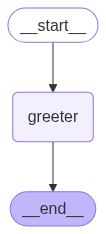

In [5]:


from typing import Dict, TypedDict
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of tasks in your application using a graph structure
# We now create an AgentState - shared data structure that keeps track of information as your application runs.
from typing import Dict, TypedDict
from langgraph.graph import StateGraph
class AgentState(TypedDict): # Our state schema
    message : str


def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state['message'] = "Hey " + state["message"] + ", how is your day going?"

    return state
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

#  Multiple_Inputs.

In [6]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
#=========================================#
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str
#=========================================#

def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)

    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"

    print(state)
    return state


graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor") # Set the starting node
graph.set_finish_point("processor") # Set the ending node

app = graph.compile() # Compiling the graph

In [7]:
answers = app.invoke({"values": [1,2,3,4], "name": "Steve"})

{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}


In [8]:
print(answers["result"])

Hi there Steve! Your sum = 10


#  seq graph

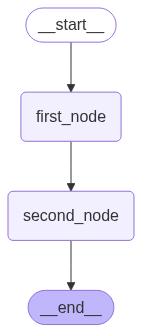

In [10]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name: str
    age: str
    final: str



def first_node(state:AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state["final"] + f" You are {state["age"]} years old!"

    return state


graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

#  Conditional

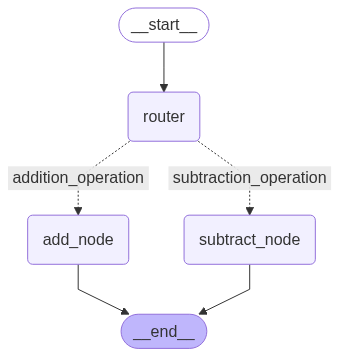

In [11]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int




def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state


def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"

    elif state["operation"] == "-":
        return "subtraction_operation"


graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) # passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }

)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()


from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [12]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2 = 5)
print(app.invoke(initial_state_1))


{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [13]:
result = app.invoke({"number1": 10, "operation": "-", "number2": 5})
print(result["finalNumber"])

5


# Looping graph

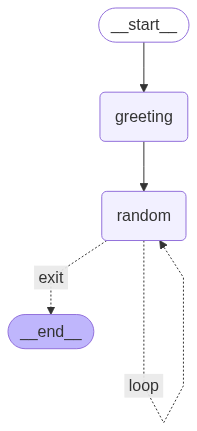

In [14]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop


graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",     # Source node
    should_continue, # Action
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

#  Basic_chat

In [ ]:


import os
from dotenv import load_dotenv


# os.environ["GROQ_API_KEY"] =
# os.environ["TAVILY_API_KEY"] =
load_dotenv()

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# تعريف State
class State(TypedDict):
    messages: Annotated[list, add_messages]

# استدعاء الموديل
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")


response = llm.invoke("Hello, how are you?")
print(response)


content='I\'m just an AI, I don\'t have emotions or feelings like humans do, so I don\'t have a good or bad day. I\'m always "on" and ready to help with any questions or tasks you may have! It\'s great to chat with you, though. How can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 16, 'total_tokens': 81, 'completion_time': 0.048291155, 'prompt_time': 0.002358024, 'queue_time': 0.048490296, 'total_time': 0.050649179}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--dbea5ca3-a494-4f10-a4b5-bf031f372b43-0' usage_metadata={'input_tokens': 16, 'output_tokens': 65, 'total_tokens': 81}


In [ ]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model


llm=init_chat_model("groq:llama3-8b-8192")
llm



ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ce1479588f0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ce1455454c0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

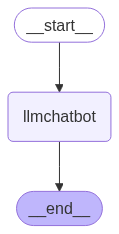

In [ ]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
for event in graph.stream({"messages":"Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help you with any questions or tasks you have! It's great to chat with you. How can I assist you today?


#  LLm with Tools

In [ ]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.langchain.com/langgraph',
   'title': 'LangGraph',
   'content': "Design agent-driven user experiences with LangGraph Platform's APIs. Quickly deploy and scale your application with infrastructure built for agents. LangGraph sets the foundation for how we can build and scale AI workloads — from conversational agents, complex task automation, to custom LLM-backed experiences that 'just work'. The next chapter in building complex production-ready features with LLMs is agentic, and with LangGraph and LangSmith, LangChain delivers an out-of-the-box solution to iterate quickly, debug immediately, and scale effortlessly.” LangGraph sets the foundation for how we can build and scale AI workloads — from conversational agents, complex task automation, to custom LLM-backed experiences that 'just work'. LangGraph Platform is a service for deploying and scaling LangGraph a

In [ ]:
 ## Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [ ]:
tools=[tool,multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ce1479588f0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ce1455454c0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list of domai

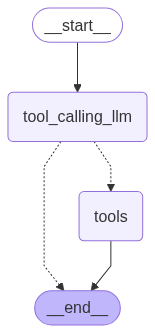

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response=graph.invoke({"messages":"What is the recent ai news"})
response['messages'][-1].content

'{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": ["https://assets.weforum.org/editor/Ktdhn0KNfhbpY_AE77yZFRYJ9zUl9hnFcncbE53QzUQ.PNG", "https://blog.tipranks.com/wp-content/uploads/2023/03/shutterstock_1818555053-750x406.jpg", "https://image4.slideserve.com/8020153/has-artificial-intelligence-latest-news-helped-l.jpg", "https://images.moneycontrol.com/static-mcnews/2023/07/Sana-1-770x433.jpg?impolicy=website&width=770&height=431", "https://i.ytimg.com/vi/h5u4bgErk0g/maxresdefault.jpg"], "results": [{"url": "https://www.rswebsols.com/news/adapting-workforce-strategies-in-the-age-of-ai-tapping-into-high-growth-industries-and-job-creation-areas-for-sustainable-investment/", "title": "Adapting Workforce Strategies in the Age of AI: Tapping into High-Growth Industries and Job-Creation Areas for Sustainable Investment - RS Web Solutions", "score": 0.7847937345504761, "published_date": "Tue, 26 Aug 2025 13:00:00 GMT", "content": "5. **Generative AI Specialis

In [ ]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent ai news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (my64kwhtx)
 Call ID: my64kwhtx
  Args:
    end_date: None
    exclude_domains: []
    include_domains: []
    include_favicon: False
    include_images: True
    query: recent ai news
    search_depth: advanced
    start_date: None
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": ["https://assets.weforum.org/editor/Ktdhn0KNfhbpY_AE77yZFRYJ9zUl9hnFcncbE53QzUQ.PNG", "https://blog.tipranks.com/wp-content/uploads/2023/03/shutterstock_1818555053-750x406.jpg", "https://image4.slideserve.com/8020153/has-artificial-intelligence-latest-news-helped-l.jpg", "https://images.moneycontrol.com/static-mcnews/2023/07/S

In [ ]:
response=graph.invoke({"messages":"What is 5 multiplied by 2"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 2
================================== Ai Message ==================================
Tool Calls:
  multiply (9hjcm24af)
 Call ID: 9hjcm24af
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: multiply

10


In [ ]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (6m4ht6k8x)
 Call ID: 6m4ht6k8x
  Args:
    query: recent AI news
    search_depth: advanced
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.accountingtoday.com/list/ai-agents-in-intuits-quickbooks-and-other-tech-stories-you-may-have-missed", "title": "AI agents in QB, and other tech stories you may have missed - Accounting Today", "score": 0.8013424277305603, "published_date": "Wed, 20 Aug 2025 13:30:13 GMT", "content": "Intuit is introducing agentic AI into QuickBooks, managers are making hiring decisions with AI, making Windows 11 faster, and seven other th

# ReAct

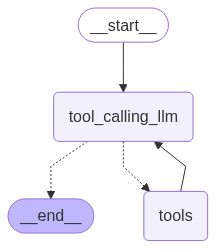

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me the recent ai news and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search (101wemsxk)
 Call ID: 101wemsxk
  Args:
    query: recent ai news
    search_depth: advanced
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.sciencedaily.com/news/computers_math/artificial_intelligence/", "title": "Artificial Intelligence News - ScienceDaily", "content": "ScienceDaily\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Wednesday, May 28, 2025\n\n### Tuesday, May 27, 2025\n\n### Thursday, May 22, 2025\n\n### Wednesday, May 21, 2025\n\n### Monday, May 19, 2025\n\n### Thursday, May 15, 20

#  Adding memory

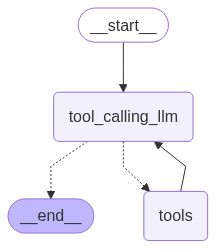

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config={"configurable":{"thread_id":"1"}}

response=graph.invoke({"messages":"Hi my name is Omar "},config=config)

response

{'messages': [HumanMessage(content='Hi my name is Omar ', additional_kwargs={}, response_metadata={}, id='aea6ed46-66f4-41d5-b1aa-27526de03212'),
  AIMessage(content='Nice to meet you, Omar!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 2868, 'total_tokens': 2876, 'completion_time': 0.006778838, 'prompt_time': 0.356185392, 'queue_time': 0.214261523, 'total_time': 0.36296423}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6a09d190-01f3-437e-a641-1b6eb0dae4ae-0', usage_metadata={'input_tokens': 2868, 'output_tokens': 8, 'total_tokens': 2876})]}

In [ ]:

response['messages'][-1].content

'Nice to meet you, Omar!'

In [ ]:
response=graph.invoke({"messages":"Hey what is my name"},config=config)

print(response['messages'][-1].content)

Your name is Omar.


#  Streaming

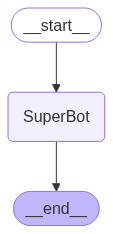

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Omar And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='2f7414c1-3eeb-47a6-a808-907c780d32ff'),
  AIMessage(content="Nice to meet you, Krish! Cricket is a fantastic sport, isn't it? Do you play or watch cricket regularly? Are you a fan of any particular team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 20, 'total_tokens': 57, 'completion_time': 0.032403709, 'prompt_time': 0.004428002, 'queue_time': 0.343472147, 'total_time': 0.036831711}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--5c13318b-0a34-47e7-871f-d5890fb86557-0', usage_metadata={'input_tokens': 20, 'output_tokens': 37, 'total_tokens': 57}),
  HumanMessage(content='Hi,My name is Omar And I like cricket', additional_kwargs={}, response_metadata={}, id='b6d0af5b-8218-4246-9fe3-3e053a8c25f0

In [ ]:

config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is sakr And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='Hi Sakr! Nice to meet you! Cricket is a great sport! Which team do you support? Are you a fan of any particular player?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 21, 'total_tokens': 52, 'completion_time': 0.027062396, 'prompt_time': 0.005237033, 'queue_time': 0.371300921, 'total_time': 0.032299429}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--aec9b12f-ca79-4b52-ae84-75dfc694c835-0', usage_metadata={'input_tokens': 21, 'output_tokens': 31, 'total_tokens': 52})]}}


In [ ]:
for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is sakr And I like cricket', additional_kwargs={}, response_metadata={}, id='53e7b006-dcfa-4b25-b3fe-a1374eaad3a9'), AIMessage(content='Hi Sakr! Nice to meet you! Cricket is a great sport! Which team do you support? Are you a fan of any particular player?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 21, 'total_tokens': 52, 'completion_time': 0.027062396, 'prompt_time': 0.005237033, 'queue_time': 0.371300921, 'total_time': 0.032299429}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--aec9b12f-ca79-4b52-ae84-75dfc694c835-0', usage_metadata={'input_tokens': 21, 'output_tokens': 31, 'total_tokens': 52}), HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='27e0a5ac-8365-4961-a332-3ccf496b1f72')]}
{'messages': [HumanMessage(conte

In [ ]:
for chunk in graph_builder.stream({'messages':"Hi,My name is menna And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hi Menna! Nice to meet you! Cricket is a great sport, isn't it? Which team do you support? Are you a fan of any particular player? It's amazing to see more people who like cricket! Sakr and Krish are already here, now we have you too!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 142, 'total_tokens': 202, 'completion_time': 0.05266595, 'prompt_time': 0.032541397, 'queue_time': 0.414620435, 'total_time': 0.085207347}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--ef02c342-23e9-432a-b083-37bec103cb56-0', usage_metadata={'input_tokens': 142, 'output_tokens': 60, 'total_tokens': 202})]}}


In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Nice to meet you, Krish! Cricket is a great sport, isn't it? Who's your favorite cricketer and team? Are you a fan of Test cricket, ODI, or T20?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 20, 'total_tokens': 63, 'completion_time': 0.03784651, 'prompt_time': 0.008750686, 'queue_time': 0.211682371, 'total_time': 0.046597196}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9d0b874f-3bf1-4504-a1b6-599797d2edda-0', usage_metadata={'input_tokens': 20, 'output_tokens': 43, 'total_tokens': 63})]}}


In [ ]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='56b51674-a4da-459c-8ca2-56e63c86398f'), AIMessage(content="Nice to meet you, Krish! Cricket is a great sport, isn't it? Who's your favorite cricketer and team? Are you a fan of Test cricket, ODI, or T20?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 20, 'total_tokens': 63, 'completion_time': 0.03784651, 'prompt_time': 0.008750686, 'queue_time': 0.211682371, 'total_time': 0.046597196}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_4b5fbf0ced', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--9d0b874f-3bf1-4504-a1b6-599797d2edda-0', usage_metadata={'input_tokens': 20, 'output_tokens': 43, 'total_tokens': 63}), HumanMessage(content='I also like football', additional_kwargs={}, response_metadata={}, id='c89d2bfa-7551-48b7-83cb-756ba6ad44e9')]}
{'messages': [HumanMessag

https://xmind.ai/share/CHRMJ3ce